In [6]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
from main import load_data
from main import CombinedDataset
# loads data, you will have to generate the data first
train_dataset, valid_dataset, test_dataset = load_data(['train', 'valid', 'test'], compression='')


C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

In [12]:
#Define Labels and images
def inputs(train_dataset,test_dataset):
    labels_train = train_dataset.labels
    labels_test = test_dataset.labels

    images_test = np.array(test_dataset.images)
    images_train = np.array(train_dataset.images)
   
    return labels_train, labels_test,images_test, images_train

In [17]:
def train_baseline_model(train_dataset,test_dataset):
    labels_train, labels_test,images_test, images_train = inputs(train_dataset,test_dataset)
    test_accuracy = []
    I = []
    train_accuracy=[]

    for i in range(200,600,50):
        np.random.seed(12)
        rf = RandomForestClassifier()
        x_train, y_train = np.array(images_train[:i]).flatten().reshape(i, -1), labels_train[:i]
        rf.fit(x_train, y_train)

        x_test, y_test = np.array(images_test[:100]).flatten().reshape(100, -1), labels_test[:100]

        accuracy_score1 = accuracy_score(rf.predict(x_test), y_test)
        accuracy_score2 = rf.score(x_train,y_train)

        train_accuracy.append(accuracy_score2*100)
        test_accuracy.append(accuracy_score1*100)

        I.append(i)
    #plt.scatter(I,train_accuracy)
    plt.scatter(I,test_accuracy)
    plt.title('Baseline Model Accuracy')
    plt.xlabel('Number of train input')
    plt.ylabel('Accuracy %')
    print(f'The highest test accuracy that this model can achieve is {max(test_accuracy)}')
    print(f'The average train accuracy that the basline model can achieve is {sum(train_accuracy)/len(train_accuracy)}')




The highest test accuracy that this model can achieve is 33.0
The average train accuracy that the basline model can achieve is 100.0


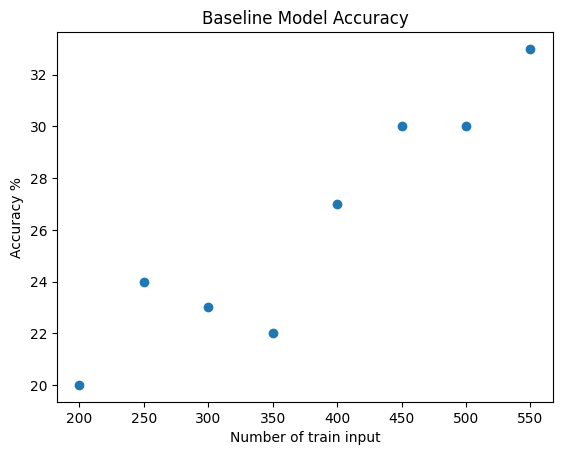

In [18]:
train_baseline_model(train_dataset,test_dataset)